# Загрузка данных

In [1]:
!gdown 1u4w_5CtxmjoBiWbhqUk_S8ijPnBFLmuZ

Downloading...
From: https://drive.google.com/uc?id=1u4w_5CtxmjoBiWbhqUk_S8ijPnBFLmuZ
To: /content/dataset.xlsx
100% 84.4M/84.4M [00:00<00:00, 144MB/s]


# Установка пакетов

In [2]:
!pip install -q xlrd

In [3]:
# импорт пакетов
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import json
import ast 

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Анализ датафрейма. Тепловая карта. Очистка от неинформативных признаков.

In [4]:
# чтение данных
df = pd.read_excel('dataset.xlsx')

In [5]:
# сбор общей информации по датасету
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

In [6]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'id' 'sort_point_distance']


In [7]:
# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['premium' 'name' 'department' 'has_test' 'response_letter_required'
 'area' 'salary' 'type' 'address' 'response_url' 'published_at'
 'created_at' 'archived' 'insider_interview' 'url' 'alternate_url'
 'relations' 'employer' 'snippet' 'contacts' 'schedule' 'working_days'
 'working_time_intervals' 'working_time_modes' 'accept_temporary'
 'description' 'experience' 'key_skills' 'specializations' 'region'
 'immediate_redirect_url']


**Размерность датасета**: 69656 строк х 34 столбца. Поверхностный осмотр выявил 3 числовых столбца. Тип данных подовляющего числа признаков - object.

---

Проведм анализ отсутствующих значений с помощью **тепловой карты**.

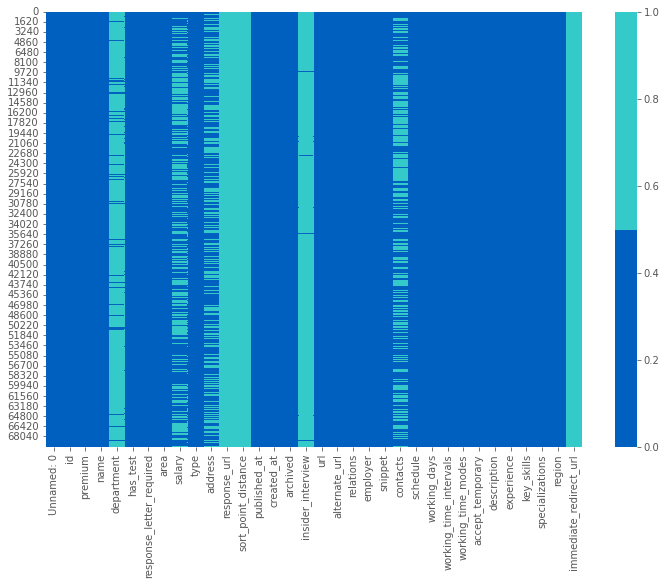

In [8]:
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#0060bf', '#35caca'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Ключевыми для исследования признаками выделим: 


1.   **name** - наименование вакансии
2.   **area** - город
3.   **salary** - вилка по з/п
4.   **employer** - наименование организации
5.   **description** - содержит информацию о требованиях и обязанностях
6.   **key_skills** - ключевые навыки
7.   **schedule** - расписание
8.   **region** - область (будет использовано для группировки городов по регионам)
9.   **experience** - опыт работы

Как мы видим из тепловой карты, признаки **department, response_url, sort_point_distance и insider_interview** имеют довольно много пустых строк. Следом за ними выделим **salary, adress, contacts,** они так же выдедяются своими пустыми строками на фоне остальных признаков. Среди важных - **salary**.

In [9]:
drop_cols = [
    'premium', 'department', 'has_test', 'response_letter_required', 'type', 'address', 'response_url', 'published_at', 'created_at', 'archived', 'insider_interview', 'url', 'alternate_url', 'relations', 
    'contacts', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'immediate_redirect_url', 'id', 'Unnamed: 0', 'sort_point_distance'
]
df_cl = df.drop(drop_cols, axis=1)
df_cl

,name,area,salary,employer,snippet,schedule,description,experience,key_skills,specializations,region
0,Младший специалист ручного тестирования,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область
1,Тестировщик.Net,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
2,Пентестер,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область
3,Ведущий Специалист по информационным технологиям,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': '4352', 'name': 'Почта России', 'url': ...",{'requirement': 'Средне-профессиональное или в...,"{'id': 'fullDay', 'name': 'Полный день'}",<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область
4,Специалист по защите информации,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область
...,...,...,...,...,...,...,...,...,...,...,...
69651,Программист Java,"{'id': '92', 'name': 'Тула', 'url': 'https://a...",NaN,"{'id': '47858', 'name': 'Центральный банк Росс...",{'requirement': 'Опыт разработки корпоративног...,"{'id': 'fullDay', 'name': 'Полный день'}",<p>В связи с формированием внешнего кадрового ...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область
69652,Программист 1C,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 130000, 'to': None, 'currency': 'RUR'...","{'id': '97966', 'name': 'Окраина', 'url': 'htt...",{'requirement': 'Доброжелательность и отзывчив...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <p>- Поддержка и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Управление Торговлей'}, {'name'...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область
69653,Начальник отдела информационных технологий,"{'id': '92', 'name': 'Тула', 'url': 'https://a...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': '4494454', 'name': 'ГУЗ ГБ № 3 Г.Тулы',...",{'requirement': 'Знать нормативные и методичес...,"{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности</strong> <p>Руководить раб...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Организаторские навыки'}, {'name': ...","[{'id': '9.94', 'name': 'Информационные технол...",Тульская область
69654,"Технический директор (DevOps, технолог)","{'id': '92', '

# EDA

## Подготовка данных.



**1.** Столбец **name**

In [10]:
dict_t = {
    '1С': '1С',
    '1C': '1С',
    '1 С': '1С',
    '1 C': '1С',
    '1-С': '1С',
    '1-C': '1С',

    'По подбору персонала': 'Менеджер по персоналу',
    'По работе с клиентами': 'Менеджер по персоналу',
    'По кадрам': 'Менеджер по персоналу',
    'По кадровому': 'Менеджер по персоналу',
    'По персоналу': 'Менеджер по персоналу',
    'Отдела кадров': 'Менеджер по персоналу',
    'Адаптации персонала': 'Менеджер по персоналу', 
    'Руководитель отдела персонала': 'Менеджер по персоналу', 
    'Рекрутер': 'Менеджер по персоналу',
    'HR менеджер': 'Менеджер по персоналу',
    'HR-специалист': 'Менеджер по персоналу',
    'Специалист по работе с персоналом': 'Менеджер по персоналу',

    'Специалист службы поддержки': 'Специалист технической поддержки',
    'Специалист поддержки': 'Специалист технической поддержки',
    'Поддержки пользователей': 'Специалист технической поддержки',  
    'Технической поддержки': 'Специалист технической поддержки', 
    'Сотрудник поддержки поиска Яндекса': 'Специалист технической поддержки',
    'Сотрудник поддержки': 'Специалист технической поддержки',
    'Сотрудник службы поддержки': 'Специалист технической поддержки',
    'Консультант онлайн-поддержки с техническими знаниями': 'Специалист технической поддержки',
    'Эксперт по ответам на вопросы о Яндекс Бизнесе': 'Специалист технической поддержки',
    'Специалист по общению с клиентами в Яндекс Бизнес': 'Специалист технической поддержки', 

    'Риэлтор': 'Специалист по недвижимости', 
    'Риелтор': 'Специалист по недвижимости',
    'По недвижимости': 'Специалист по недвижимости',
    'По аренде': 'Специалист по недвижимости',
    'По продаже недвижимости': 'Специалист по недвижимости',
    'По продажам недвижимости': 'Специалист по недвижимости', 
    'По работе с недвижимостью': 'Специалист по недвижимости',

    'Системный аналитик': 'Системный аналитик',
    'системный-аналитик': 'Системный аналитик',

    'Выездной сервисный инженер': 'Инженер',
    'Ведущий инженер': 'Инженер',

    'Контент-менеджер': 'Маркетинг',
    'SMM-менеджер': 'Маркетинг',
    'SMM-специалист': 'Маркетинг',
    'Маркетолог-аналитик': 'Маркетинг',
    'Помощник маркетолога': 'Маркетинг',
    'SMM специалист': 'Маркетинг',

    'Менеджер проектов': 'Project-менеджер',
    'Project manager': 'Project-менеджер',
    'Менеджер проекта': 'Project-менеджер',
    'Проектный менеджер': 'Project-менеджер',

    'Продакт-менеджер': 'Product-менеджер',
    'Менеджер по продукту': 'Product-менеджер',
    'Product Manager': 'Product-менеджер',

    'Продуктовый аналитик': 'Product-аналитик',
    'Product аналитик': 'Product-аналитик',
    'Product-аналитик': 'Product-аналитик',
    'Product Analyst': 'Product-аналитик',
    'Product-Analyst': 'Product-аналитик',

    'По защите информации': 'Специалист по информационной безопасности',
    'Информационной безопасности': 'Специалист по информационной безопасности',
    'Начальник отдела информационных технологий': 'Специалист по информационной безопасности',

    'Системный администратор': 'Системный администратор',
    'Помощник системного администратора': 'Системный администратор',

    'DevOps': 'DevOps-инженер',

    'Младший специалист ручного тестирования': 'QA Engineer/Тестировщик',
    'Тестировщик': 'QA Engineer/Тестировщик',
    'Инженер по нагрузочному тестированию': 'QA Engineer/Тестировщик',
    'QA': 'QA Engineer/Тестировщик',
    'Q A': 'QA Engineer/Тестировщик',
    'Q&A': 'QA Engineer/Тестировщик',
    'Q/A': 'QA Engineer/Тестировщик',
    
    'Бизнес-аналитик': 'Бизнес-аналитик',
    'Аналитик бизнес-процессов': 'Бизнес-аналитик',
    'Менеджер по бизнес-процессам': 'Бизнес-аналитик',

    'Компьютерный Мастер': 'IT-специалист',
    'Специалист по IT': 'IT-специалист',

    'Технический писатель (дистанционный автор)': 'Технический писатель',

    'Тренажёрного зала': 'Персональный тренер',
    'Тренажерного зала': 'Персональный тренер',
    'Инструктор': 'Персональный тренер',
    'Тренер': 'Персональный тренер',

    'Графический дизайнер': 'UX/UI дизайнер',

    'Технический директор': 'Руководитель проекта',
    'Product Owner': 'Руководитель проекта',
    'Администратор проектов': 'Руководитель проекта',
    'Менеджер IT-проектов' : 'Руководитель проекта',
    'Руководитель проектов': 'Руководитель проекта',
    'Администратор проекта': 'Руководитель проекта',
    'Руководитель проекта': 'Руководитель проекта',
    'Руководитель IT проектов': 'Руководитель проекта',

    'Веб-программист': 'Web-разработчик',
    'Web-программист': 'Web-разработчик',
    'Web-разработчик': 'Web-разработчик',

    'PHP-разработчик': 'PHP-разработчик',
    'PHP-программист': 'PHP-разработчик',
    'PHP Developer': 'PHP-разработчик',
    'PHP-Developer': 'PHP-разработчик',

    'Дизайнер-верстальщик': 'Frontend-разработчик',
    'Frontend': 'Frontend-разработчик',
    'Front-end': 'Frontend-разработчик',

    'Backend': 'Backend-разработчик',
    'Back-end': 'Backend-разработчик',

    'Java разработчик': 'Java-разработчик',
    'Java Developer': 'Java-разработчик',

    'Менеджер по продажам': 'Продажи',
    'Аналитик отдела продаж': 'Продажи',

    'Ведущий аналитик': 'Аналитик',

    'Data Analyst': 'Data-аналитик',
    'Data-Analyst': 'Data-аналитик',
    'Аналитик данных': 'Data-аналитик',
    'Data аналитик': 'Data-аналитик',
    'Data-аналитик': 'Data-аналитик',

    'С#-разработчик': 'С#-разработчик',
    'С# разработчик': 'С#-разработчик',
    'Программист C#': 'С#-разработчик',
    'Разработчик C#': 'С#-разработчик',
    'C# developer': 'С#-разработчик',
    'Junior C#': 'С#-разработчик',
    'Middle C#': 'С#-разработчик',
    'Senior C#': 'С#-разработчик',
    'Team Lead C#': 'С#-разработчик',
    'Программист С#': 'С#-разработчик',

    'С++-разработчик': 'С++-разработчик',
    'С++ разработчик': 'С++-разработчик',
    'Программист С++': 'С++-разработчик',
    'Разработчик С++': 'С++-разработчик',
    'С++ developer': 'С++-разработчик',
    'Junior С++': 'С++-разработчик',
    'Middle С++': 'С++-разработчик',
    'Senior С++': 'С++-разработчик',
    'Team Lead С++': 'С++-разработчик',

    'Data Scientist': 'Data Scientist',

    'Data Engeneer': 'Data Engeneer',

    'Java разработчик': 'Программист Java',
    'Java-разработчик': 'Java-разработчик',
    'Java developer': 'Java-разработчик',
    'Junior Java': 'Java-разработчик',
    'Middle Java': 'Java-разработчик',
    'Senior Java': 'Java-разработчик',
    'Программист Java': 'Java-разработчик',
    'Разработчик Java': 'Java-разработчик', 
    'Team Lead Java': 'Java-разработчик',
    'Java team lead': 'Java-разработчик',

    'Python разработчик': 'Python-разработчик',
    'Python-разработчик': 'Python-разработчик',
    'Python developer': 'Python-разработчик',
    'Junior Python': 'Python-разработчик',
    'Middle Python': 'Python-разработчик',
    'Senior Python': 'Python-разработчик',
    'Программист Python': 'Python-разработчик',
    'Разработчик Python': 'Python-разработчик', 
    'Team Lead Python': 'Python-разработчик',
    'Python team lead': 'Python-разработчик',

    'IOS developer': 'IOS-разработчик',
    'IOS-developer': 'IOS-разработчик',
    'IOS разработчик': 'IOS-разработчик',
    'IOS-разработчик': 'IOS-разработчик',
    'Разработчик iOS': 'IOS-разработчик',
    'Под iOS': 'IOS-разработчик',
    'Swift ios': 'IOS-разработчик',
    '(ios)': 'IOS-разработчик',
    'Team Lead IOS': 'IOS-разработчик',

    'Android разработчик': 'Android-разработчик',
    'Android developer': 'Android-разработчик',
    'Android-разработчик': 'Android-разработчик',
    'Android-developer': 'Android-разработчик',
}

In [11]:
for i in range(1, int(df_cl['name'].shape[0])):
  for key in dict_t:
    try:
      if key.lower() in df_cl['name'][i].lower():
        df_cl['name'][i] = dict_t[key]
    except:
      continue

In [12]:
df_cl['name'].value_counts()[:50]

Менеджер по персоналу                        6692
1С                                           4994
Специалист по недвижимости                   4104
Специалист технической поддержки             3638
Системный администратор                      3016
QA Engineer/Тестировщик                      2228
Персональный тренер                          1676
Руководитель проекта                         1522
Frontend-разработчик                         1357
Специалист по информационной безопасности    1184
Project-менеджер                             1169
Системный аналитик                           1097
Маркетинг                                    1079
DevOps-инженер                                975
Java-разработчик                              844
Бизнес-аналитик                               730
Backend-разработчик                           730
Инженер                                       715
Product-менеджер                              654
UX/UI дизайнер                                503


**2.**  **area**.

Serias area представляет собой json. В ключе name находится искомое значение. Напишем функцию, которая загрузит строку из serias в json и вернет нам значение ключа name. Во избежание поломки ввиду аномальных значений используем блок try-except.

In [14]:
df_cl['area_json'] = df_cl['area'].apply(eval) # eval() - преобразует строку в код

In [15]:
# Если нет области в скобках, вернет зн-е ключа name
# Если есть, то вернет срез значения до скобки (
def area_name(json):
  try:
    i1 = json['name'].index('(')
    return json['name'][:i1].strip()
  except:
    return json['name']

In [16]:
df_cl['area_values'] = df_cl['area_json'].apply(area_name)

**3.** Далее приведем к единому виду **salary**.

Данный serias представляет собой json. Указана вилка з/п. Сама з/п указана не только в РУБ, но также представлена в валютах.

In [17]:
df_cl['salary_json'] = df_cl['salary'].fillna('{}').apply(eval)

In [18]:
rates = dict(RUR=1, USD=53, EUR=56, KZT=0.12)

In [19]:
def get_values_from(json):
  try:
    return json['from']
  except:
    return None

In [20]:
def get_values_cur(json):
  try:
    return json['currency']
  except:
    return None

In [21]:
def get_values_to(json):
  try:
    return json['to']
  except:
    return None

In [22]:
df_cl['currency'] = df_cl['salary_json'].apply(get_values_cur)

In [23]:
df_cl['salary_from'] = df_cl['salary_json'].apply(get_values_from)
df_cl['min_salary_rur'] = df_cl['currency'].map(rates) * df_cl['salary_from']

In [24]:
df_cl['salary_to'] = df_cl['salary_json'].apply(get_values_to)
df_cl['max_salary_rur'] = df_cl['currency'].map(rates) * df_cl['salary_to']

In [25]:
df_cl['mean_salary_rur'] = df_cl[['min_salary_rur', 'max_salary_rur']].dropna().mean(axis=1).astype(int)

In [26]:
df_cl['mean_salary_rur']

0            NaN
1        37500.0
2            NaN
3            NaN
4        20000.0
          ...   
69651        NaN
69652        NaN
69653        NaN
69654        NaN
69655        NaN
Name: mean_salary_rur, Length: 69656, dtype: float64

In [27]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             69656 non-null  object 
 1   area             69656 non-null  object 
 2   salary           37590 non-null  object 
 3   employer         69656 non-null  object 
 4   snippet          69656 non-null  object 
 5   schedule         69656 non-null  object 
 6   description      69656 non-null  object 
 7   experience       69656 non-null  object 
 8   key_skills       69656 non-null  object 
 9   specializations  69656 non-null  object 
 10  region           69656 non-null  object 
 11  area_json        69656 non-null  object 
 12  area_values      69656 non-null  object 
 13  salary_json      69656 non-null  object 
 14  currency         37590 non-null  object 
 15  salary_from      34074 non-null  float64
 16  min_salary_rur   34074 non-null  float64
 17  salary_to   

**4.** Далее приведем к единому виду **employer**.

In [28]:
df_cl['employer'][8]

"{'id': '5219383', 'name': 'Служба по тарифам Астраханской области', 'url': 'https://api.hh.ru/employers/5219383', 'alternate_url': 'https://hh.ru/employer/5219383', 'logo_urls': None, 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=5219383', 'trusted': True}"

 Снова json, для очистки создаём функцию text_to_json(text), с учетом того, что булевы  False и True не валидны для метода loads(), как и пустые значения:

In [29]:
def employer_to_values(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"').replace('None', '"None"').replace('True', '"True"').replace('False', '"False"'))['name']
  except:
    []

In [30]:
df_cl['employer_values'] = df_cl['employer'].apply(employer_to_values)

In [31]:
df_cl['employer_values'].isna().sum()

49

5. Далее приведем к единому виду **schedule**.

In [32]:
df_cl['schedule_json'] = df_cl['schedule'].apply(eval)

In [33]:
def schedule_value(json):
  return json['name']

df_cl['schedule_values'] = df_cl['schedule_json'].apply(schedule_value)

In [34]:
df_cl['schedule_values'].unique()

array(['Удаленная работа', 'Полный день', 'Гибкий график',
       'Сменный график', 'Вахтовый метод'], dtype=object)

6. Далее приведем к единому виду key_skills.

Заменяем все None на пустой список:

In [35]:
df_cl['key_skills'] = df_cl['key_skills'].fillna('[]')
df_cl['key_skills']

0                                                       []
1        [{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...
2        [{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...
3        [{'name': 'Пользователь ПК'}, {'name': 'Работа...
4        [{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...
                               ...                        
69651                                                   []
69652    [{'name': '1С: Управление Торговлей'}, {'name'...
69653    [{'name': 'Организаторские навыки'}, {'name': ...
69654                                                   []
69655    [{'name': 'Информационная безопасность'}, {'na...
Name: key_skills, Length: 69656, dtype: object

Функция для обработки json:

In [36]:
def key_skills_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []

In [37]:
df_cl['key_skills_into_json'] = df_cl['key_skills'].apply(key_skills_to_json)

Создаём функцию преобразования json в список с учетом проверки на наличие пустого списока. В случае ошибки создаём пустой список.

In [38]:
def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []

In [39]:
df_cl['key_skills_list'] = df_cl['key_skills_into_json'].apply(get_values)

In [40]:
df_cl['key_skills_list']

0                                                       []
1                        [Git, SQL, Тестирование, C#, API]
2        [SQL, Linux, Информационная безопасность, Рабо...
3        [Пользователь ПК, Работа в команде, 1С: Предпр...
4        [MS Dos, Диагностика ПК, Компьютер, Работа в у...
                               ...                        
69651                                                   []
69652    [1С: Управление Торговлей, 1С: Предприятие 8, ...
69653    [Организаторские навыки, Работа в команде, Упр...
69654                                                   []
69655    [Информационная безопасность, Аудит безопаснос...
Name: key_skills_list, Length: 69656, dtype: object

7. Далее приведем к единому виду specializations.

In [41]:
df_cl['specializations'] = df['specializations']

In [42]:
def specializations_to_list(text):
  try:
    out = []
    if len(text)>0:
      i = 0
      for i in range(0, len(json.loads(text.replace("'", '"')))):
        out.append(json.loads(text.replace("'", '"'))[i]['name'])
    return out
  except:
    print('Error: ', text)

In [43]:
df_cl['specializations_list'] = df_cl['specializations'].apply(specializations_to_list)

In [44]:
new_df = df_cl[['specializations_list']]
top_spec = new_df.explode('specializations_list').dropna()
top_spec.value_counts()[20:40]

specializations_list                            
Учет кадров                                         5477
Тестирование                                        2892
Игровое ПО                                          2890
Дизайн, графика, живопись                           2889
Компьютерная безопасность                           2882
Дизайнер                                            2646
Верстальщик                                         2632
Информационные технологии                           1829
Тренерский состав                                   1625
PR, Маркетинговые коммуникации                      1603
Интернет-маркетинг                                  1553
Управление маркетингом                              1532
Производство рекламы                                1530
Менеджмент продукта (Product manager)               1483
Информационные технологии, Интернет, Мультимедиа     791
CTO, CIO, Директор по IT                             614
Технический писатель                   

8. Подготовим snippet

In [45]:
def snippet_target(json):
    return json['requirement']

df_cl['requirement_values'] = df_cl['snippet'].fillna('[]').apply(eval).apply(snippet_target)

9. Подготовим experience

In [47]:
df_cl['experience_json'] = df_cl['experience'].apply(eval)

def experience_value(json):
  return json['name']

df_cl['experience_values'] = df_cl['experience_json'].apply(experience_value)

10. Преобразуем признак  region

Сгруппируем регионы по федеральным округам.

In [48]:
# Загрузка вспомогательной таблицы соответствия регион-округ
!gdown --id 1Vu5YdiI8jQTkm5PX6e4dLLZ8A0OBuGOB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Vu5YdiI8jQTkm5PX6e4dLLZ8A0OBuGOB
To: /content/Regions.xlsx
100% 10.8k/10.8k [00:00<00:00, 12.2MB/s]


In [49]:
df_reg = pd.read_excel('Regions.xlsx')
df_cl = pd.merge(df_cl, df_reg)

In [50]:
df_cl['district']

0        ЮФО
1        ЮФО
2        ЮФО
3        ЮФО
4        ЮФО
        ... 
69651    ЦФО
69652    ЦФО
69653    ЦФО
69654    ЦФО
69655    ЦФО
Name: district, Length: 69656, dtype: object

## Выборка данных

Отфильтруем датасет по интересующим специализациям.

In [54]:
spec_list = ['Программирование', 'Аналитик', 'Сетевые технологии', 'Тестирование']

In [55]:
df_new = df_cl[df_cl['specializations_list'].astype(str).str.contains('|'.join(spec_list), case=False)]

In [56]:
df_new

,name,area,salary,employer,snippet,schedule,description,experience,key_skills,specializations,...,employer_values,schedule_json,schedule_values,key_skills_into_json,key_skills_list,specializations_list,requirement_values,experience_json,experience_values,district
0,Младший специалист ручного тестирования,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': '1740', 'name': 'Яндекс', 'url': 'https...",{'requirement': 'Внимательны и наблюдательны. ...,"{'id': 'remote', 'name': 'Удаленная работа'}",<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",...,Яндекс,"{'id': 'remote', 'name': 'Удаленная работа'}",Удаленная работа,[],[],"[Начальный уровень, Мало опыта, Тестирование, ...",Внимательны и наблюдательны. Уверенно пользует...,"{'id': 'noExperience', 'name': 'Нет опыта'}",Нет опыта,ЮФО
1,QA Engineer/Тестировщик,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': '1245158', 'name': 'МФК Саммит', 'url':...",{'requirement': 'Мы ищем талантливого и амбици...,"{'id': 'fullDay', 'name': 'Полный день'}",<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",...,МФК Саммит,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день,"[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[Git, SQL, Тестирование, C#, API]","[Программирование, Разработка, Инженер, Тестир...",Мы ищем талантливого и амбициозного тестировщи...,"{'id': 'between1And3', 'name': 'От 1 года до 3...",От 1 года до 3 лет,ЮФО
2,Пентестер,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': '719820', 'name': 'SearchInform', 'url'...",{'requirement': 'Глубокие знания клиентских и ...,"{'id': 'fullDay', 'name': 'Полный день'}",<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",...,SearchInform,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день,"[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[SQL, Linux, Информационная безопасность, Рабо...","[Программирование, Разработка, Инженер, Тестир...",Глубокие знания клиентских и серверных операци...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",От 3 до 6 лет,ЮФО
3,Ведущий Специалист по информационным технологиям,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': '4352', 'name': 'Почта России', 'url': ...",{'requirement': 'Средне-профессиональное или в...,"{'id': 'fullDay', 'name': 'Полный день'}",<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",...,Почта России,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день,"[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[Пользователь ПК, Работа в команде, 1С: Предпр...","[Компьютерная безопасность, Сетевые технологии...",Средне-профессиональное или высшее.,"{'id': 'noExperience', 'name': 'Нет опыта'}",Нет опыта,ЮФО
4,Специалист по информационной безопасности,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': '6694236', 'name': 'ГБПОУ АО Астраханск...","{'requirement': 'Медицинская комиссия, справка...","{'id': 'fullDay', 'name': 'Полный день'}",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",...,ГБПОУ АО Астраханский музыкальный колледж имен...,"{'id': 'fullDay', 'name': 'Полный день'}",Полный день,"[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[MS Dos, Диагностика ПК, Компьютер,

Столбец name

Взглянем на Топ30 вакансий в интересующем поле деятельности:

In [57]:
df_new['name'].value_counts()[:30]

1С                                           4504
Системный администратор                      2950
QA Engineer/Тестировщик                      2205
Frontend-разработчик                         1310
Системный аналитик                           1085
Специалист по информационной безопасности    1079
Маркетинг                                    1043
Руководитель проекта                         1042
Project-менеджер                             1012
DevOps-инженер                                923
Java-разработчик                              810
Backend-разработчик                           706
Бизнес-аналитик                               704
Инженер                                       663
UX/UI дизайнер                                490
PHP-разработчик                               457
Аналитик                                      442
IOS-разработчик                               395
Python-разработчик                            389
Web-разработчик                               368


Для дальнейшего учета не будем брать во внимание вакансии таких направленностей, как:
*   "1С", т.к. направление очень узкоспециализированное.
*   "Руководитель проекта" и т.п., одного обучения недостаточно.
*   "Техническая поддержка", т.к. компания не занимается R'N'D собственного продукта.
*   "Маркетинг" - нам тоже не интересна
*   "Инженер" - техническая специальность
*   "Продажи" - так же другая сфера деятельности




In [58]:
min_name = ['1С', 'Руководитель проекта', 'Маркетинг', 'Инженер', 
            'Специалист технической поддержки', 'Дизайнер', 
            'Сетевой инженер', 'Продажи', 'Системный инженер', 
            'Администратор баз данных', 'Ведущий сетевой инженер', 
            'Сетевой администратор', 'Системный администратор',
            'Системный аналитик', 'Специалист по информационной безопасности',
            'Разработчик (поисковая выдача)', 'Аналитик'
            ]
filter = ~(df_new['name'].astype(str).isin(min_name))
filtered_df = df_new[filter]
filtered_df['name'].value_counts()[:30]

QA Engineer/Тестировщик                  2205
Frontend-разработчик                     1310
Project-менеджер                         1012
DevOps-инженер                            923
Java-разработчик                          810
Backend-разработчик                       706
Бизнес-аналитик                           704
UX/UI дизайнер                            490
PHP-разработчик                           457
IOS-разработчик                           395
Python-разработчик                        389
Web-разработчик                           368
Android-разработчик                       345
Инженер-программист                       325
С#-разработчик                            299
Data-аналитик                             203
С++-разработчик                           198
Программист                               179
IT-специалист                             136
Product-аналитик                          114
Data Scientist                            102
Программист-разработчик           

Сформируем список интересующих вакансий (минимальный порог вхождения по количеству- 100 шт.):

In [59]:
v = filtered_df['name'].value_counts()[:30]
v = v.to_frame(name='vacancy')
v.reset_index(inplace=True)
v['index']

vacancy_list = []

for i in range(0, 21):
  if 'программист' not in v['index'][i].lower() and 'it-специалист' not in v['index'][i].lower():
    vacancy_list.append(v['index'][i])

In [60]:
vacancy_list

['QA Engineer/Тестировщик',
 'Frontend-разработчик',
 'Project-менеджер',
 'DevOps-инженер',
 'Java-разработчик',
 'Backend-разработчик',
 'Бизнес-аналитик',
 'UX/UI дизайнер',
 'PHP-разработчик',
 'IOS-разработчик',
 'Python-разработчик',
 'Web-разработчик',
 'Android-разработчик',
 'С#-разработчик',
 'Data-аналитик',
 'С++-разработчик',
 'Product-аналитик',
 'Data Scientist']

Рассмотрим датасет исключительно для вышеуказанных вакансий:

In [61]:
filter = filtered_df['name'].astype(str).isin(vacancy_list)
pre_df = filtered_df[filter]
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11030 entries, 1 to 69651
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  11030 non-null  object 
 1   area                  11030 non-null  object 
 2   salary                4248 non-null   object 
 3   employer              11030 non-null  object 
 4   snippet               11030 non-null  object 
 5   schedule              11030 non-null  object 
 6   description           11030 non-null  object 
 7   experience            11030 non-null  object 
 8   key_skills            11030 non-null  object 
 9   specializations       11030 non-null  object 
 10  region                11030 non-null  object 
 11  area_json             11030 non-null  object 
 12  area_values           11030 non-null  object 
 13  salary_json           11030 non-null  object 
 14  currency              4248 non-null   object 
 15  salary_from        

In [62]:
target_df = pre_df[['name', 'area_values', 'region', 'district', 'min_salary_rur', 'mean_salary_rur', 'max_salary_rur', 'employer_values', 'schedule_values', 'key_skills_list', 'specializations_list', 'experience_values']]

In [63]:
target_df.drop(labels=[63529], axis=0, inplace=True)

In [64]:
target_df

,name,area_values,region,district,min_salary_rur,mean_salary_rur,max_salary_rur,employer_values,schedule_values,key_skills_list,specializations_list,experience_values
1,QA Engineer/Тестировщик,Астрахань,Астраханская область,ЮФО,25000.0,37500.0,50000.0,МФК Саммит,Полный день,"[Git, SQL, Тестирование, C#, API]","[Программирование, Разработка, Инженер, Тестир...",От 1 года до 3 лет
20,Бизнес-аналитик,Астрахань,Астраханская область,ЮФО,NaN,NaN,NaN,Тамерлан,Полный день,"[MS Visio, Оптимизация бизнес-процессов, Модел...","[Другое, Аналитик, Аналитик, Другое]",От 1 года до 3 лет
24,Бизнес-аналитик,Астрахань,Астраханская область,ЮФО,NaN,NaN,NaN,Ай-Теко (I-Teco),Удаленная работа,"[Управление проектами, Бизнес-анализ, Системны...","[Другое, Аналитик, Аналитик, Другое]",От 1 года до 3 лет
35,Project-менеджер,Астрахань,Астраханская область,ЮФО,50000.0,65000.0,80000.0,FinFort,Полный день,"[Управление проектами, Работа с большим объемо...","[Программирование, Разработка, Системы управле...",От 1 года до 3 лет
108,PHP-разработчик,Астрахань,Астраханская область,ЮФО,50000.0,NaN,NaN,НПП ДосЛаб,Удаленная работа,[],"[Программирование, Разработка, Системы управле...",От 1 года до 3 лет
...,...,...,...,...,...,...,...,...,...,...,...,...
69645,Web-разработчик,Тула,Тульская область,ЦФО,100000.0,NaN,NaN,UTLab,Полный день,"[jQuery, PHP, 1С-Битрикс, Linux, Git, Figma, H...","[Программирование, Разработка, Системы управле...",От 3 до 6 лет
69646,Web-разработчик,Тула,Тульская область,ЦФО,70000.0,100000.0,130000.0,Максимастер,Полный день,"[PHP, HTML, JavaScript, MySQL, CSS, ООП, Git, ...","[Программирование, Разработка, Системы управле...",От 1 года до 3 лет
69647,Web-разработчик,Тула,Тульская область,ЦФО,130000.0,165000.0,200000.0,Максимастер,Удаленная работа,"[Веб-программирование, Управление проектами, H...","[Программирование, Разработка, Системы управле...",От 3 до 6 лет
69649,С++-разработчик,Тула,Тульская область,ЦФО,NaN,NaN,250000.0,SearchInform,Полный день,"[STL, C/C++, C++, ООП, Boost]","[Программирование, Разработка, Системы управле...",От 3 до 6 лет


##Анализ и визуализация данных

Посмотрим на cписок отфильтрованных вакансий в разрезе предлагаемой средней заработной платы:

In [ ]:
target_df['mean_salary_rur'].describe().astype(int)

count       2038
mean      143616
std        86065
min        15000
25%        70000
50%       130000
75%       200000
max      1015000
Name: mean_salary_rur, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


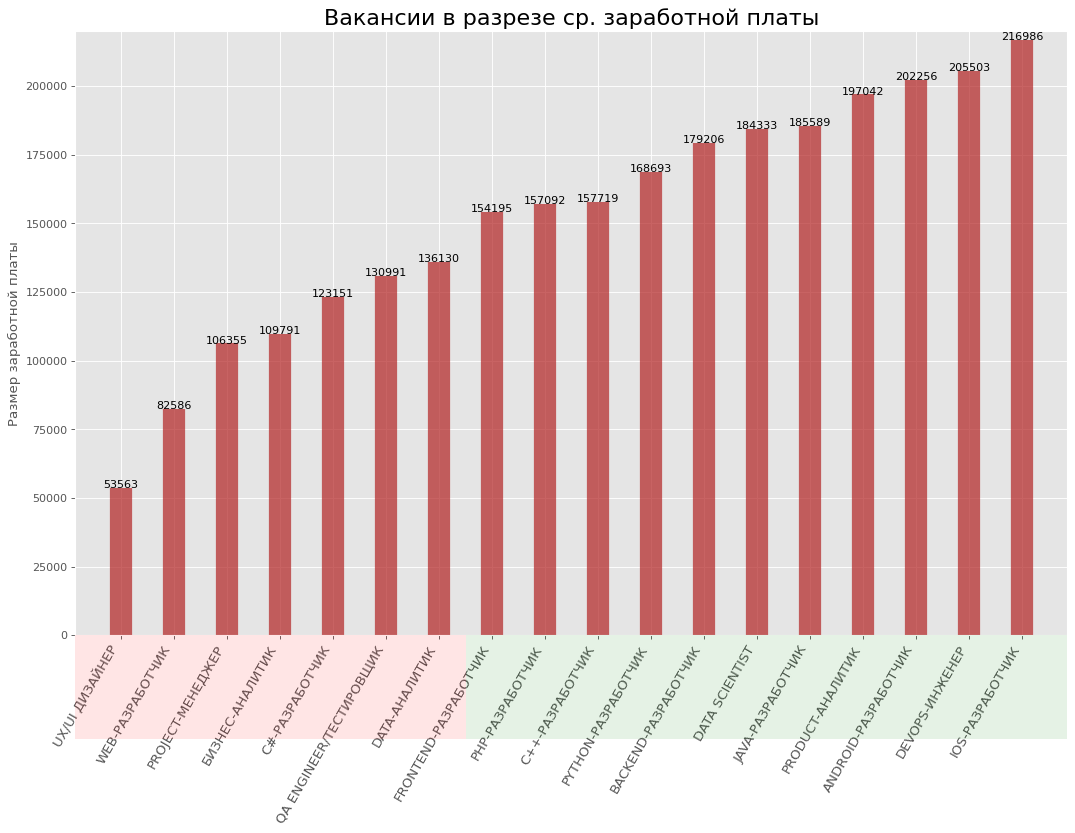

In [ ]:
# Prepare Data
nps = target_df[['name', 'mean_salary_rur']].groupby('name').apply(lambda g: g.mean())
nps.sort_values('mean_salary_rur', inplace=True)
nps.reset_index(inplace=True)

#Draw a plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=nps.index, ymin=0, ymax=nps.mean_salary_rur, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, mean_salary in enumerate(nps.mean_salary_rur):
    ax.text(i, mean_salary+0.5, round(mean_salary), horizontalalignment='center')

# Title, Label, Ticks and Ylim
ax.set_title('Вакансии в разрезе ср. заработной платы', fontdict={'size':20})
ax.set(ylabel='Размер заработной платы', ylim=(0, 220000))
plt.xticks(nps.index, nps.name.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.43, -0.005), width=.47, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.125, -0.005), width=.305, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

На графике представлены вакансии в разрезе ср. з/п. Снизу красным и зеленым цветами обозначены зоны. Красная - средний размер з/п до 100 т.р. Зеленая - свыше 100 т.р. 

Самая низкооплачиваемая вакансия - UX/UI дизайнер, что очевидно, т.к. не требует особенных знаний. 

Наиболее высокооплачиваемая - IOS-разработчик.

Среди аналитиков градация по з/п следующая: бизнес-аналитик < data-аналитик < product-аналитик.

Backend специалист оценивается дороже, нежели чем Frontend.

Python-разработчик оценивается приблизительно так же, как и Backend, т.к. для написания Backend'a чаще используют ЯП Python.

Изучим географию распределения вакансий.

In [ ]:
area = target_df['area_values'].value_counts().dropna()[:20]
area

Москва             3465
Санкт-Петербург    1820
Новосибирск         604
Екатеринбург        433
Казань              419
Нижний Новгород     340
Ростов-на-Дону      255
Краснодар           244
Самара              219
Томск               180
Воронеж             173
Пермь               147
Челябинск           126
Уфа                 121
Омск                108
Саратов             104
Красноярск           94
Барнаул              87
Ижевск               87
Ульяновск            85
Name: area_values, dtype: int64

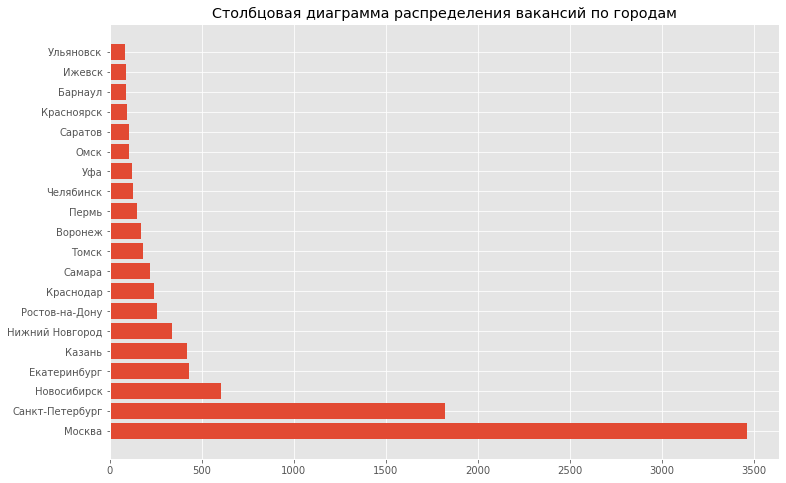

In [ ]:
plt.barh(area.index, area.values)
plt.title('Столбцовая диаграмма распределения вакансий по городам')
plt.show()

Лидирующие города по количеству предложенных вакансий - города-миллионники. С подовляющим большинством выступает г. Москва.

Проанализиуем связь между вакансиями и опытом работы.

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с опытом работы\n')

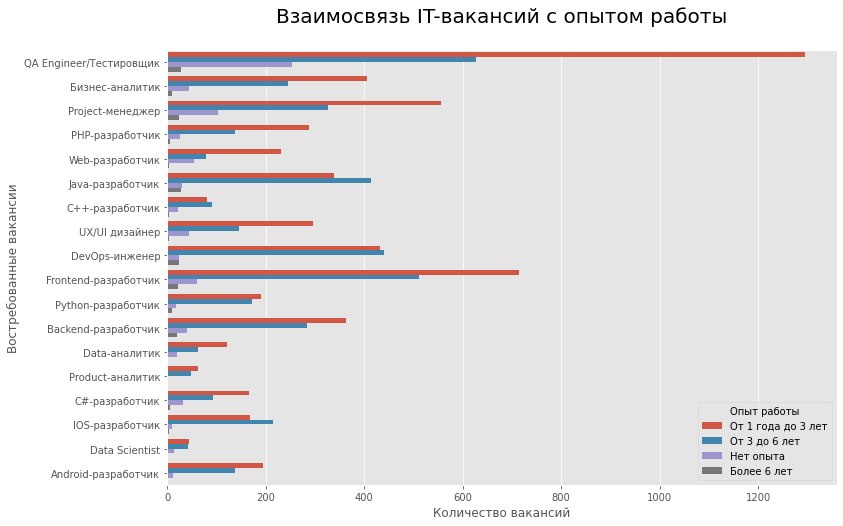

In [ ]:
# Groupe Data
cross_tab = pd.crosstab(target_df.experience_values, target_df.name)

#Draw a plot
fig = sns.countplot(y=target_df.name, hue=target_df.experience_values, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='Опыт работы', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с опытом работы\n', fontsize=20)

Из графика видно, что работодатели ищут middle специалистов с опытом работы от 1 до 3 лет.

Присутствуют сферы, где более востребованы специалисты с большим опытом работы: Java, Dev-Ops, IOS.

Для половины вакансий из выборки наблюдается востребованность в пропорции 2:1, где 2 -  специалист с опытом работы от 1 до 3 лет, 1 - специалист с опытом работы от 3 до 6 лет.

Вакансии, для которых опыт работы не важен составляют малую часть. Если показатель наличия опыта мы примем как степень сложности вхождения в сферу, то самыми лояльными направлениями будут: Q/A, Project-менеджер, Frontend, Web-разработчик, UX/UI.    


Посмотрим на связь вакансий с графиком работы

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с графиком работы\n')

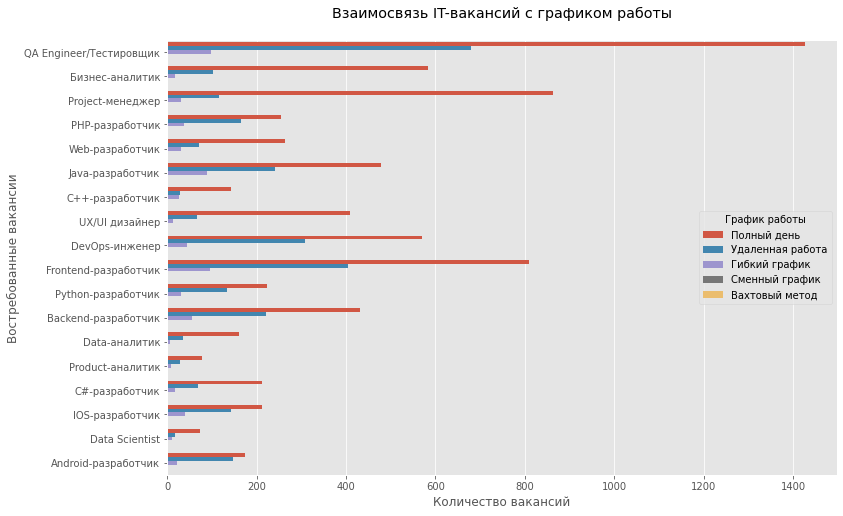

In [65]:
# Groupe Data
cross_tab = pd.crosstab(target_df.schedule_values, target_df.name)

#Draw a plot
fig = sns.countplot(y=target_df.name, hue=target_df.schedule_values, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='График работы', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с графиком работы\n')

Как мы видим из графика, для работодателя важен выход сотрудника в офис, т.к. для всех ваканий превалирует показатель "Полный день".

Однако, в таких сферах, как: Q/A, PHP, Java, DevOps, Frontend, Python, Backend, IOS, работодатель готов нанимать сотрудников в пропорции 2:1 (как в офис, так и на удаленный график). 

Для Android сферы это соотношениие близится к 1:1.


## Выводы по EDA:

Наибольшее количество вакантных рабочих мест находится в городах-миллионниках: Москва, Санкт-Петербург, Новосибирск, Екатеринбург, Казань. 

Средняя з/п по вакансиям находится в диапозоне от 85 до 140 т.р. Причем ниже 100 т.р. готовы платить только web-разработчикам и UX/UI дизайнерам. 

Среди направленностей в вакансиях присутствуют все современные технологии разработки, использующиеся в корпоративной деятельности.

Работодатели заинтересованы набирать соискателей в пропорциях 2:1, где 2- специалист с опытом работы от 1 до 3 лет, 1 - специалист с опытом работы от 3 до 6 лет. Специалисты без опыта работы наиболее востребованы по направлениям: Q/A, Project-менеджер, Frontend, Web-разработчик, UX/UI.

Что касается графика работы, то работодатели активно ищут специалистов на удаленный режим работы и гибкий график. Однако офисные сотрудники на полный рабочий день востребованы в большем количестве.

Подитожив, составлено представление о доходе сотрудника, его опыте и графике работы, что существенно поможет в дальнейшем исследовании описать портрет целевого потребителя продукта. 

# Статистический анализ данных

Импорт пакетов

In [ ]:
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 50

Оценим тип данных для каждого из признаков.

>Тип данных для датасета target_df:
1. name (наименование вакансии) - категориальный тип
2. area_values (город, в котором размещена вакансия) - категориальный тип
3. region (регион, в котором размещена вакансия) - категориальный тип
4. min_salary_rur (минимальный порог з/п) - количественный тип
5. mean_salary_rur (среднее значение з/п) - количественный тип
6. max_salary_rur (максимальный порог з/п) - количественный тип
7. employer_values (работодатель) - категориальный тип
8. schedule_values (график работы) - категориальный тип
9. key_skills_list (ключевые навыки) - категориальный тип
10. specialization_list (специализации) - категориальный тип
11. experience_values (опыт работы) - категориальный тип

**Посмотрим на распределение з/п по количеству вакансий (количественные данные)**

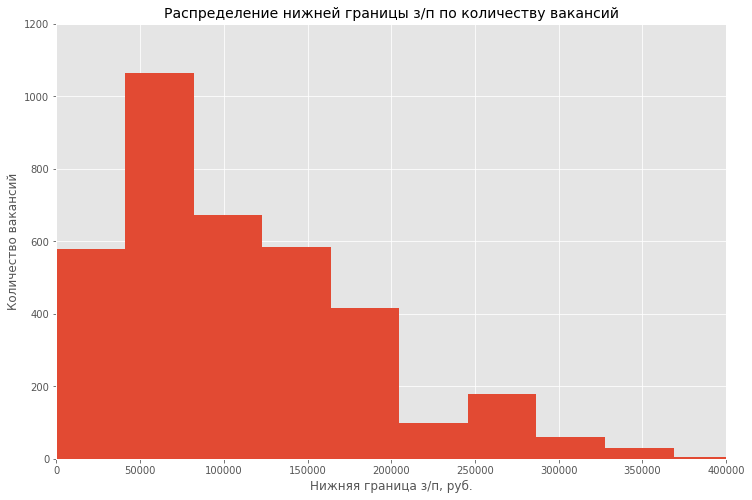

In [ ]:
target_df['min_salary_rur'].hist(bins=11)
plt.title("Распределение нижней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Нижняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.ylim(0, 1200)
plt.xlim(0, 400000)
plt.show()

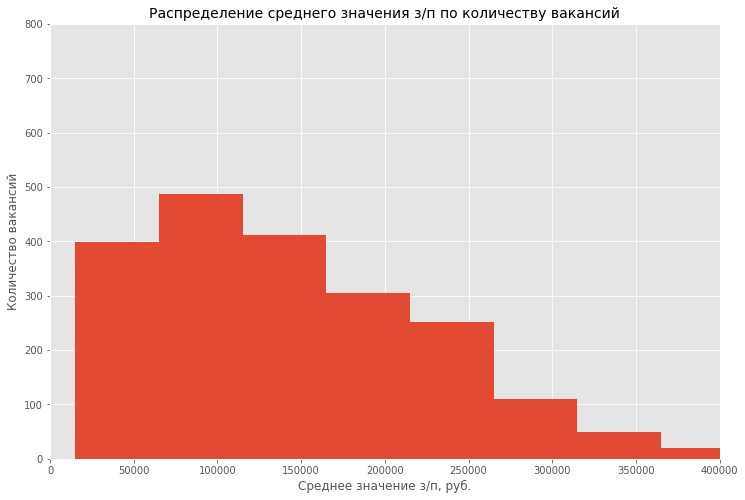

In [ ]:
target_df['mean_salary_rur'].hist(bins=20)
plt.title("Распределение среднего значения з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Среднее значение з/п, руб.', fontsize = 12) # Подпись оси x
plt.ylim(0, 800)
plt.xlim(0, 400000)
plt.show()

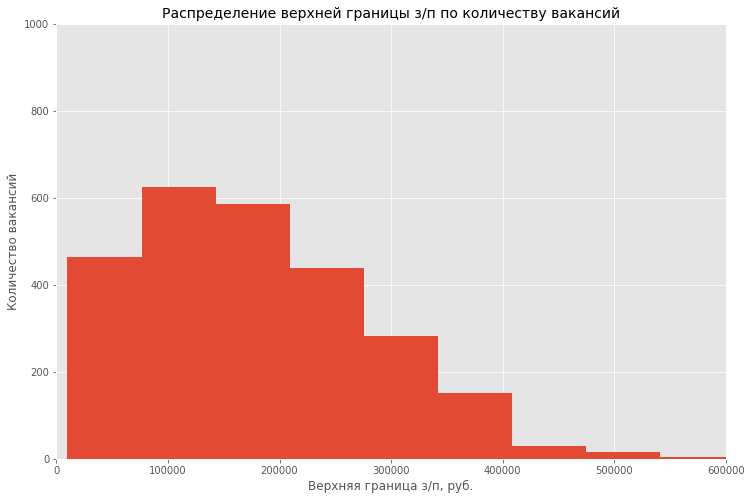

In [ ]:
target_df['max_salary_rur'].hist(bins=30)
plt.title("Распределение верхней границы з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12) # Подпись оси Y
plt.xlabel('Верхняя граница з/п, руб.', fontsize = 12) # Подпись оси x
plt.ylim(0, 1000)
plt.xlim(0, 600000)
plt.show()

Для количественных показателей проверим гипотезы о виде распределения. Таких признаков у нас всего три, это - min_salary, mean_salary, max_salary. Т.к. количество значений у каждого из признаков превышает значение в 5000 шт., прибегнем к тесту д'Агостино

> Гипотеза Н0: наблюдаемые выборки принадлежат нормальным генеральным совокупностям, уровень значимости полагаем равным 0,05

In [ ]:
stats.normaltest(target_df['min_salary_rur'].dropna())

NormaltestResult(statistic=427.4625469022071, pvalue=1.5055227759830667e-93)

In [ ]:
stats.normaltest(target_df['mean_salary_rur'].dropna())

NormaltestResult(statistic=555.1070843643754, pvalue=2.8842187616262015e-121)

In [ ]:
stats.normaltest(target_df['max_salary_rur'].dropna())

NormaltestResult(statistic=1688.8378136916435, pvalue=0.0)

 Результаты визуализации и тестов позволяют нам убедиться, что наблюдаемые выборки не подчиняются нормальному закону распределения. Данное утверждение позволяет нам отвергнуть Н0 и сделать выбор в пользу альтернативной гипотезы Н1.

> Гипотеза Н1: наблюдаемые выборки не принадлежат нормальному закону распределения, для оценки закона распределения прибегнем к непараметрическим критериям.

**Проведем оценку связи между количественными и категориальными показателями**

Проанализируем связь между средним значением з/п и графиком работы, навыков и опыта, прибегнув к непараметрическим критериям. Т.к. внутри признаков количество групп больше 2, то для оценки будем использовать критерий Краскала-Уолиса.

1. График работы

> Гипотеза Н0: статистически значимые отличия в группах (график работы, ср. зн-е з/п) отсутствуют.

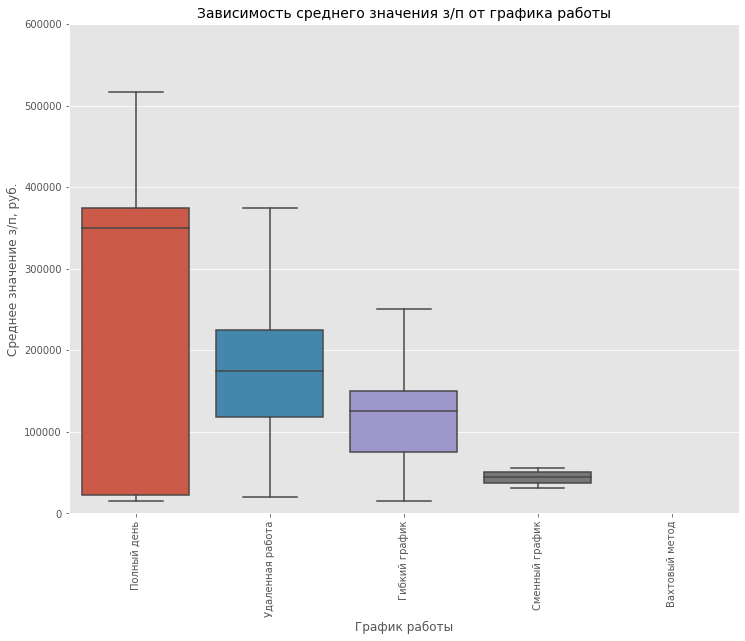

In [ ]:
# Расчёт процентилей
percentile1 = np.percentile(target_df[target_df['schedule_values'] == 'Полный день']
                            ['mean_salary_rur'].dropna(), 1) # 1% процентиль
percentile99 = np.percentile(target_df[target_df['schedule_values'] == 'Полный день']
                             ['mean_salary_rur'].dropna(), 99) # 99% процентиль

# Обработка выбросов
tgt1 = target_df.drop(target_df.loc[(target_df['schedule_values'] == 'Полный день') &
                                    (target_df['mean_salary_rur'] > percentile1) &
                                    (target_df['mean_salary_rur'] < percentile99)].index)
tgt2 = tgt1.drop(tgt1.loc[(tgt1['schedule_values'] == 'Удаленная работа') &
                          (tgt1['mean_salary_rur'] > 390000)].index)
tgt3 = tgt2.drop(tgt2.loc[(tgt2['schedule_values'] == 'Гибкий график') &
                          (tgt2['mean_salary_rur'] > 260000)].index)
tgt4 = tgt3.drop(tgt3.loc[(tgt3['schedule_values'] == 'Сменный график') &
                          (tgt3['mean_salary_rur'] > 170000)].index)

# Построение графика
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x='schedule_values', y='mean_salary_rur', data=tgt4)
plt.title("Зависимость среднего значения з/п от графика работы", fontsize = 14)
plt.ylabel('Среднее значение з/п, руб.', fontsize = 12) # Подпись оси Y
plt.xlabel('График работы', fontsize = 12) # Подпись оси x
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.ylim(0, 600000)
plt.show()

In [ ]:
dfd1=np.array(tgt4[tgt4['schedule_values']=='Сменный график']['mean_salary_rur'])
dfd2=np.array(tgt4[tgt4['schedule_values']=='Полный день']['mean_salary_rur'])
dfd3=np.array(tgt4[tgt4['schedule_values']=='Гибкий график']['mean_salary_rur'])
dfd4=np.array(tgt4[tgt4['schedule_values']=='Удаленная работа']['mean_salary_rur'])

stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4)

KruskalResult(statistic=60.30711901292102, pvalue=5.053940265867299e-13)

Результаты статистики критерия следующие: p-value < 0,05 (уровень значимости), следовательно, гипотеза Н0 отклоняется, а значит, что график работы также оказывает влияние на размер з/п.

2. Опыт

Сопоставим категории опыта работы со ср. зн-ем з/п.

> Гипотеза Н0: статистически значимые отличия в группах (опыт работы) отсутствуют.

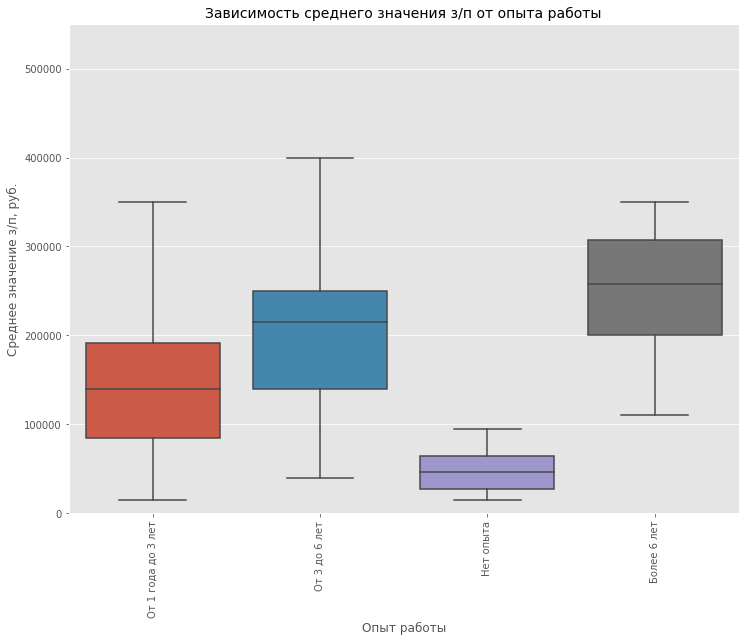

In [ ]:
# Обработка выбросов
tgt5 = tgt4.drop(tgt4.loc[(tgt4['experience_values'] == 'От 1 года до 3 лет') &
                          (tgt4['mean_salary_rur'] >360000)].index)
tgt6 = tgt5.drop(tgt5.loc[(tgt5['experience_values'] == 'Нет опыта') &
                          (tgt5['mean_salary_rur'] >100000)].index)
tgt7 = tgt6.drop(tgt6.loc[(tgt6['experience_values'] == 'Более 6 лет') &
                          (tgt6['mean_salary_rur'] >400000)].index)

# Построение графика
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x='experience_values', y='mean_salary_rur', data = tgt7)
plt.title("Зависимость среднего значения з/п от опыта работы", fontsize = 14)
plt.ylabel('Среднее значение з/п, руб.', fontsize = 12) # Подпись оси Y
plt.xlabel('Опыт работы', fontsize = 12) # Подпись оси x
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.ylim(0, 550000)
plt.show()

In [ ]:
dfd1=np.array(tgt7[tgt7['experience_values']=='От 1 до 3 лет']['mean_salary_rur'])
dfd2=np.array(tgt7[tgt7['experience_values']=='От 3 до 6 лет']['mean_salary_rur'])
dfd3=np.array(tgt7[tgt7['experience_values']=='Нет опыта']['mean_salary_rur'])
dfd4=np.array(tgt7[tgt7['experience_values']=='Более 6 лет']['mean_salary_rur'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4)

KruskalResult(statistic=115.45450098609264, pvalue=7.349081508939172e-25)

Результаты статистики критерия следующие: p-value < 0,05 (уровень значимости), следовательно, гипотеза Н0 отклоняется, а значит, что опыт работы оказывает влияние на размер з/п.

3. Регион

Сопоставим категории региона работы со ср. зн-ем з/п.

> Гипотеза Н0: статистически значимые отличия в группах (регион) отсутствуют.

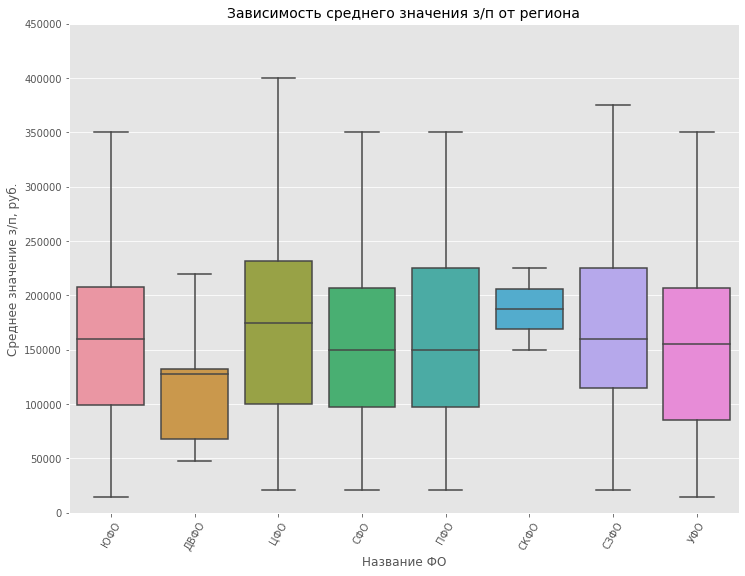

In [ ]:
# Обработка выбросов
tgt8 = tgt7.drop(tgt7.loc[(tgt7['district'] == 'СЗФО') &
                          (tgt7['mean_salary_rur'] >380000)].index)


# Построение графика
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x='district', y='mean_salary_rur', data = tgt8)
plt.title("Зависимость среднего значения з/п от региона", fontsize = 14)
plt.ylabel('Среднее значение з/п, руб.', fontsize = 12) # Подпись оси Y
plt.xlabel('Название ФО', fontsize = 12) # Подпись оси x
plt.xticks(fontsize = 10, rotation = 60) # поворот подписи на 90 градусов
plt.ylim(0, 450000)
plt.show()

In [ ]:
tar6_d1=np.array(tgt8[tgt8['district']=='ЮФО']['mean_salary_rur'])
tar6_d2=np.array(tgt8[tgt8['district']=='ДВФО']['mean_salary_rur'])
tar6_d3=np.array(tgt8[tgt8['district']=='ЦФО']['mean_salary_rur'])
tar6_d4=np.array(tgt8[tgt8['district']=='СФО']['mean_salary_rur'])
tar6_d5=np.array(tgt8[tgt8['district']=='ПФО']['mean_salary_rur'])
tar6_d6=np.array(tgt8[tgt8['district']=='СКФО']['mean_salary_rur'])
tar6_d7=np.array(tgt8[tgt8['district']=='СЗФО']['mean_salary_rur'])
tar6_d8=np.array(tgt8[tgt8['district']=='УФО']['mean_salary_rur'])
stats.mstats.kruskalwallis(tar6_d1, tar6_d2, tar6_d3, tar6_d4,
                           tar6_d5, tar6_d6, tar6_d7, tar6_d8)

KruskalResult(statistic=12.167014861682969, pvalue=0.0951985465096814)

Результаты статистики критерия следующие: p-value > 0,05 (уровень значимости), следовательно, гипотеза Н0 принимается, а значит, что регион вакансии не оказывает сильного влияния на размер з/п.

In [ ]:
res_ms = tgt8['mean_salary_rur'].dropna().astype(int).describe()
res_ms.round(2)

count       750.00
mean     166577.00
std       85264.69
min       15000.00
25%      100000.00
50%      160000.00
75%      225000.00
max      400000.00
Name: mean_salary_rur, dtype: float64

3. Навыки

Взглянем на ТОП20 навыков, владение которыми ожидают работодатели от специалстов.

In [ ]:
top_skills = target_df.explode('key_skills_list')

In [ ]:
top_skills['key_skills_list'].value_counts()[:20]

Git                            2760
SQL                            2206
JavaScript                     1583
Linux                          1458
Java                           1450
Python                         1431
PostgreSQL                     1137
Английский язык                 992
Docker                          920
ООП                             880
PHP                             880
MySQL                           814
HTML                            737
Atlassian Jira                  699
Управление проектами            685
CSS                             672
Тестирование                    646
Работа в команде                538
Функциональное тестирование     514
TypeScript                      505
Name: key_skills_list, dtype: int64

In [ ]:
skill_d = ['Git', 'SQL', 'Docker']
top_d = top_skills[top_skills['key_skills_list'].isin(skill_d)]

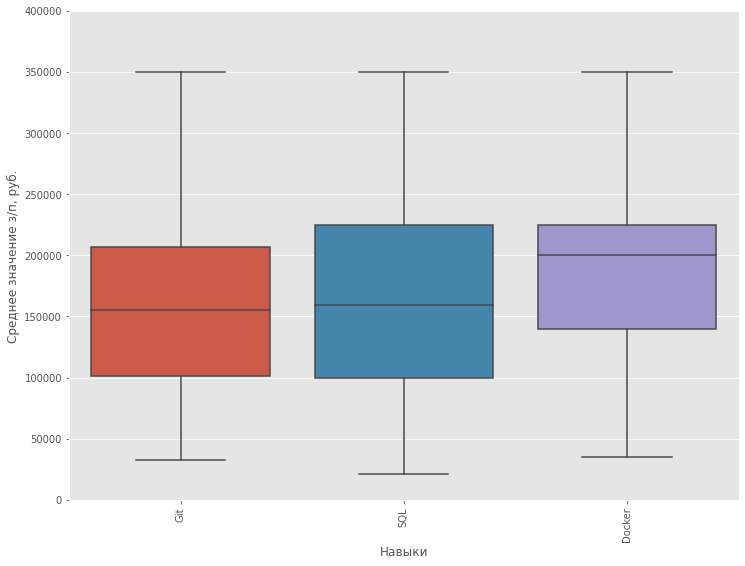

In [ ]:
# Обработка выбросов
tg = top_d.drop(top_d.loc[top_d['mean_salary_rur'] >374000].index)
# Построение графика
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x='key_skills_list', y='mean_salary_rur', data=tg)
plt.ylabel('Среднее значение з/п, руб.', fontsize = 12) # Подпись оси Y
plt.xlabel('Навыки', fontsize = 12) # Подпись оси x
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.ylim(0, 400000)
plt.show()

In [ ]:
tg_d1=np.array(tg[tg['key_skills_list']=='Git']['mean_salary_rur'])
tg_d2=np.array(tg[tg['key_skills_list']=='SQL']['mean_salary_rur'])
tg_d3=np.array(tg[tg['key_skills_list']=='Docker']['mean_salary_rur'])
stats.mstats.kruskalwallis(tg_d1, tg_d2, tg_d3)

KruskalResult(statistic=22.317547993849935, pvalue=1.424971007707556e-05)

Сформируем список с наиболее востребованными навыками, которые могут расширить функцинальность специалиста:

In [ ]:
skill_dict = ['Git', 'SQL', 'Docker', 'Linux', 'Java', 'Python']
fts = top_skills[top_skills['key_skills_list'].isin(skill_dict)]

В этом датасете мы исключим один навык SQL из списка. 

In [ ]:
nfts = fts[~(fts['key_skills_list'] == skill_dict[1])]
new_n = nfts[['name', 'mean_salary_rur']].groupby('name').apply(lambda g: g.mean())
new_n.sort_values('mean_salary_rur', inplace=True)
new_n.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
nfts = fts[fts['key_skills_list'] == skill_dict[1]]
new_y = nfts[['name', 'mean_salary_rur']].groupby('name').apply(lambda g: g.mean())
new_y.sort_values('mean_salary_rur', inplace=True)
new_y.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
cross_tab = pd.crosstab(fts.key_skills_list, fts.name)
cross_tab

name,Android-разработчик,Backend-разработчик,Data Scientist,Data-аналитик,DevOps-инженер,Frontend-разработчик,IOS-разработчик,Java-разработчик,PHP-разработчик,Product-аналитик,Project-менеджер,Python-разработчик,QA Engineer/Тестировщик,Web-разработчик,Бизнес-аналитик,С#-разработчик,С++-разработчик
key_skills_list,,,,,,,,,,,,,,,,,
Docker,0,134,5,2,452,32,0,77,53,0,1,71,68,5,0,20,0
Git,136,330,9,10,257,568,132,294,219,0,8,135,436,108,0,69,49
Java,202,85,8,2,40,10,9,629,1,0,0,4,440,14,1,4,1
Linux,4,132,3,9,550,48,3,71,77,1,5,113,314,35,8,13,72
Python,1,106,86,114,287,19,0,5,1,66,11,341,346,12,14,6,16
SQL,4,176,48,136,74,31,3,285,98,82,37,98,891,44,107,85,7


**Проведем парную оценку для категориальных признаков с помощью таблиц сопряженности**

1. Вакансий в разрезе опыта работы

Сформируем таблицу сопряженности для вакансий в разрезе опыта работы:

In [ ]:
# Groupe Data
ct = pd.crosstab(tgt8.experience_values, tgt8.name)

> Гипотеза Н0: различия между двумя группами (имя вакансий и опыт работы) статистически незначимы.

Сформируем гистограмму вакансий в разрезе опыта работы.

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с опытом работы\n')

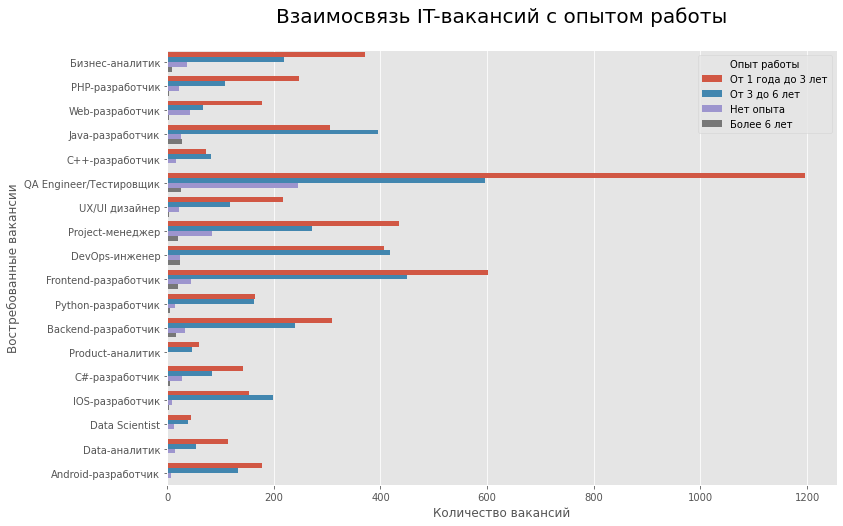

In [ ]:
#Draw a plot
fig = sns.countplot(y=tgt8.name, hue=tgt8.experience_values, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='Опыт работы', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с опытом работы\n', fontsize=20)

Произведем рассчет статистических показателей (оценка связи двух двух показателей с помощью критерия хи2):

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(ct)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 514.5789282990918
degrees of freedom: 51
p-value: 7.408058397732506e-78



Результаты рассчетов показали, что p-value < 0.05, следовательно, различия между двумя группами статистически значимы. Таким образом, можно уверенно утверждать, что разновидности вакансий связаны с опытом работы.

2. Вакансий в разрезе графика работы

Сформируем таблицу сопряженности для вакансий в разрезе графика работы:

In [ ]:
# Groupe Data
cross_tab = pd.crosstab(tgt8.schedule_values, tgt8.name)

> Гипотеза Н0: различия между двумя группами (имя вакансий и график работы) статистически незначимы.

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с графиком работы\n')

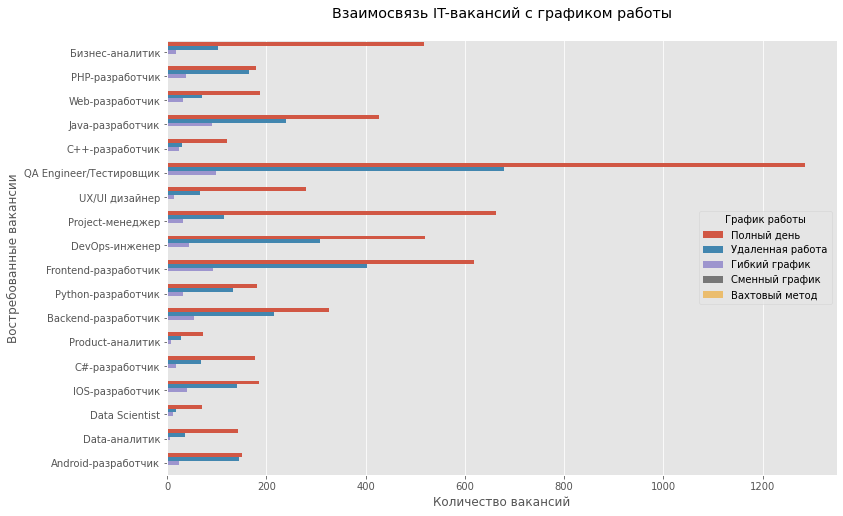

In [ ]:
#Draw a plot
fig = sns.countplot(y=tgt8.name, hue=tgt8.schedule_values, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='График работы', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с графиком работы\n')

Произведем рассчет статистических показателей (оценка связи двух двух показателей с помощью критерия хи2):

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(cross_tab)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 569.6977032051973
degrees of freedom: 68
p-value: 2.5618759356723868e-80



Результаты рассчетов показали, что p-value < 0.05, следовательно, различия между двумя группами статистически значимы. Таким образом, можно уверенно утверждать, что разновидности вакансий связаны со значениями графика работы.

3. Вакансий в разрезе навыков специалистов

Сформируем таблицу сопряженности для вакансий в разрезе навыков специалистов:

In [ ]:
# Groupe Data
ct_s = pd.crosstab(fts.key_skills_list, fts.name)

> Гипотеза Н0: различия между двумя группами (имя вакансий и навыки специалистов) статистически незначимы.

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с навыками\n')

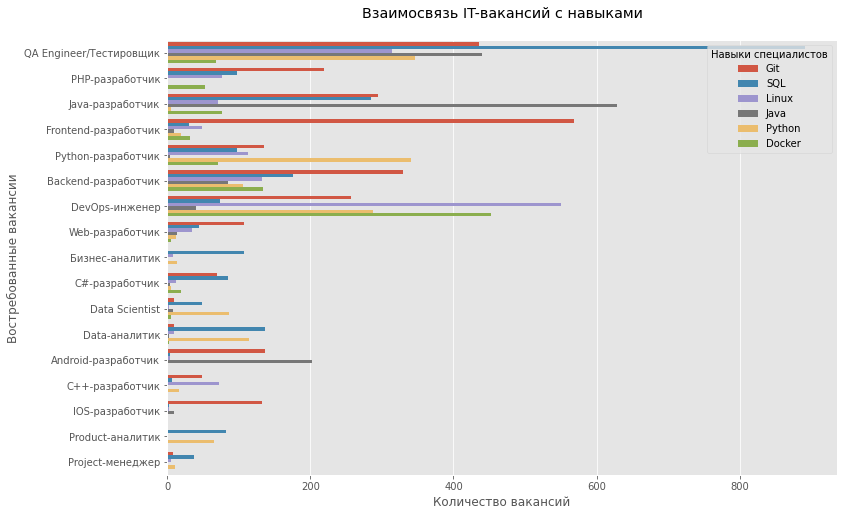

In [ ]:
#Draw a plot
fig = sns.countplot(y=fts.name, hue=fts.key_skills_list, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='Навыки специалистов', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с навыками\n')

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с навыками\n')

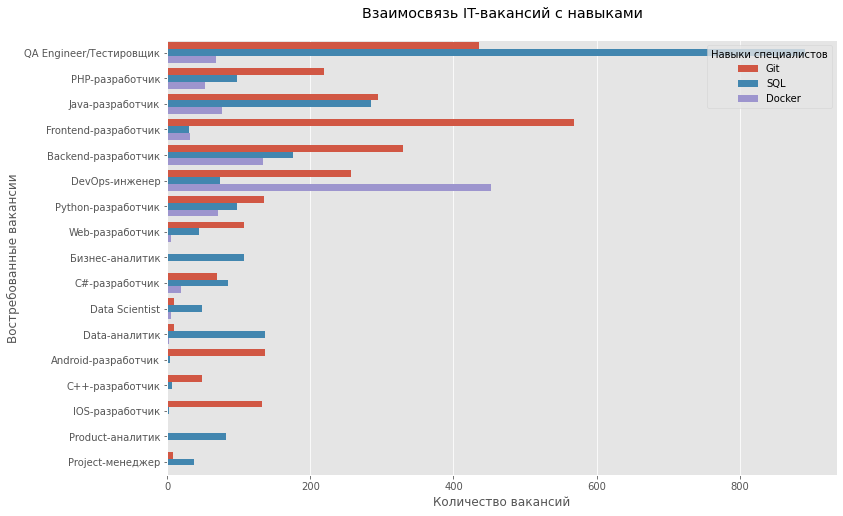

In [ ]:
#Draw a plot
fig = sns.countplot(y=top_d.name, hue=top_d.key_skills_list, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='Навыки специалистов', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с навыками\n')

Произведем рассчет статистических показателей (оценка связи двух двух показателей с помощью критерия хи2):

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(ct_s)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 7794.580772591321
degrees of freedom: 80
p-value: 0.0



Результаты рассчетов показали, что p-value < 0.05, следовательно, различия между двумя группами статистически значимы. Таким образом, можно уверенно утверждать, что разновидности вакансий связаны с навыками специалистов.

In [ ]:
# Groupe Data
ct_d = pd.crosstab(tgt8.district, tgt8.name)

Text(0.5, 1.0, 'Взаимосвязь IT-вакансий с ФО\n')

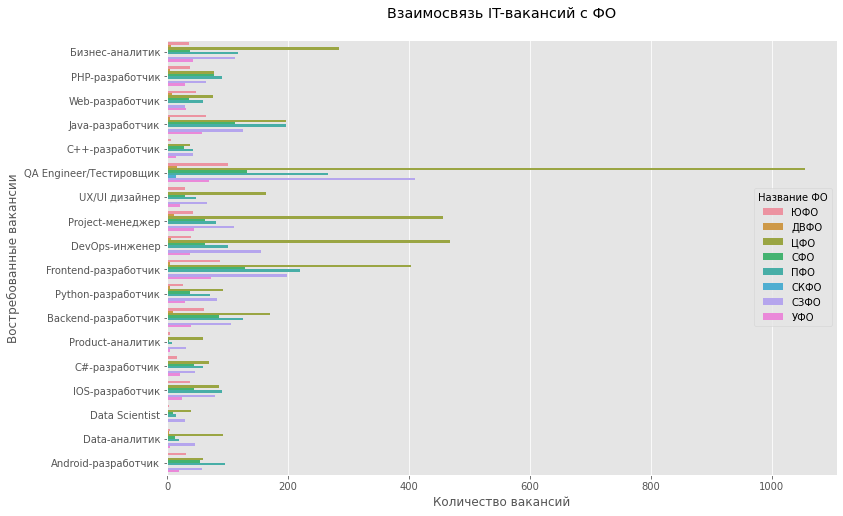

In [ ]:
#Draw a plot
fig = sns.countplot(y=tgt8.name, hue=tgt8.district, saturation=0.8)

#Title, Lable & Legend
fig.legend(title='Название ФО', fontsize=10)
plt.ylabel('Востребованные вакансии')
plt.xlabel('Количество вакансий')
plt.title('Взаимосвязь IT-вакансий с ФО\n')

In [ ]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(ct_d)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, df, prob))

test Statistics: 1013.5724486774211
degrees of freedom: 119
p-value: 8.615019834904953e-142



**Корреляционный анализ**

Сформиуем признаки рангового типа для наблюдений: ФО, график работы, опыт работы.

In [ ]:
# Создадим ранговый словарь для федеральных округов
d_dict = {
    'ЮФО': 1, 'ДВФО': 2, 'ЦФО': 3, 'СФО': 4, 'ПФО': 5,
    'СКФО': 6, 'СЗФО': 7, 'УФО': 8
}

# Создадим новый признак, являющимся ранговым для ФО с помощью метода map
tgt8['r_district'] = tgt8['district'].map(d_dict)

In [ ]:
# Создадим ранговый словарь для графика работы
d_schedule = {
    'Полный день': 1, 'Гибкий график': 1, 'Сменный график': 1,
    'Удаленная работа': 4, 'Вахтовый метод': 5
}

# Создадим новый признак, являющимся ранговым для графика с помощью метода map
tgt8['r_schedule'] = tgt8['schedule_values'].map(d_schedule)

In [ ]:
# Создадим ранговый словарь для опыта работы
d_experience = {
    'Нет опыта': 1, 'От 1 года до 3 лет': 2, 'От 3 до 6 лет': 3,
    'Более 6 лет': 4
}

# Создадим новый признак, являющимся ранговым для опыта с помощью метода map
tgt8['r_experience'] = tgt8['experience_values'].map(d_experience)

 Произведем расчет коэффициентов Спирмена для оценки степени тесноты статистической связи между показателями. 

In [ ]:
# ранговая корреляция Спирмена
tgt8[['mean_salary_rur', 'r_district', 'r_schedule', 'r_experience']].corr(method='spearman') 

,mean_salary_rur,r_district,r_schedule,r_experience
mean_salary_rur,1.000000,-0.032498,0.258466,0.499238
r_district,-0.032498,1.000000,0.006851,0.023804
r_schedule,0.258466,0.006851,1.000000,0.062559
r_experience,0.499238,0.023804,0.062559,1.000000


Изобразим графически значения коэффициентов с помощью тепловой карты. Обращаясь к теории: значаение коэф-та лежит в интервале от -1 до 1, чем ближе зн-е коэф-та по модулю к нулю, тем слабее связь, чем ближе к 1 - сильнее.

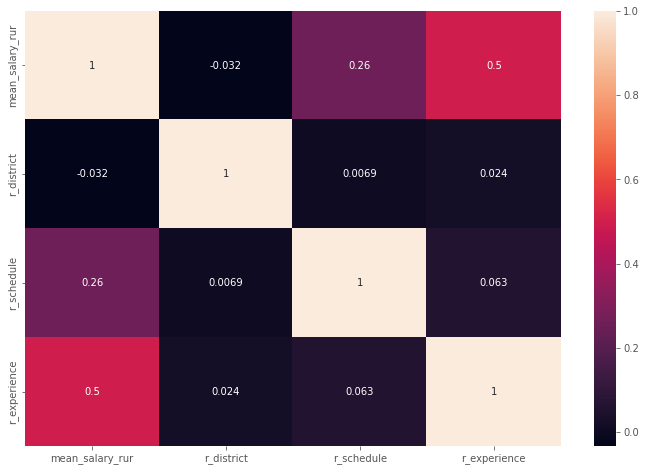

In [ ]:
ran = ['mean_salary_rur', 'r_district', 'r_schedule', 'r_experience']
hm = sns.heatmap(tgt8[ran].corr(method = 'spearman'), annot=True)

Как мы видим из графика, наиболее ярко выражена связь между опытом и средним уровнем з/п, а так же между графиком и средним уровнем з/п.

Сформируем новый датасет, избавимся от строк, для которых неизвестен средний уровень з/п и произведем оценку p-value для пар признаков.

In [ ]:
tgt9 = tgt8.copy(deep=True)

In [ ]:
tgt9 = tgt9[~(tgt9['mean_salary_rur'].isna())]

In [ ]:
writer = pd.ExcelWriter('topskil.xlsx')
tgt9.to_excel(writer)
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [ ]:
scipy.stats.spearmanr(tgt9.mean_salary_rur, tgt9.r_district)

SpearmanrResult(correlation=-0.032498172775364334, pvalue=0.3741377742515618)

In [ ]:
scipy.stats.spearmanr(tgt9.mean_salary_rur, tgt9.r_experience)

SpearmanrResult(correlation=0.49923750186678484, pvalue=1.5945768167303795e-48)

In [ ]:
scipy.stats.spearmanr(tgt9.mean_salary_rur, tgt9.r_schedule)

SpearmanrResult(correlation=0.2584664654901654, pvalue=6.522136613995314e-13)

Графическая интерпретация коэф-та Спирмена совпала с рассчитанными значениями p-value. Нулевую гипотезу H0 принимаем только для признака district (ФО). Для признаков schedule (график работы) и experience (опыт работы) принимаем H1.

**Регрессионный анализ**

В датасете количественный тип данных представлен признаком, описывающим з/п. Однако, ряд категориальных признаков были представлены в ранговой интерпретации. Соотвественно, далее будет представлена функциональную зависимость уровня з/п от ряда признаков.

**Навыки**

In [ ]:
# Создадим ранговый словарь для опыта работы
d_skills = {
    'Git': 1, 'SQL': 2, 'Linux': 3, 'Java': 4, 'Python': 5, 'Docker': 6 
}

# Создадим новый признак, являющимся ранговым для опыта с помощью метода map
fts['r_skills'] = fts['key_skills_list'].map(d_skills)

Для категориальной переменной key_skills_list создадим ряд фиктивных переменных, которые будут являться индикаторами уровня.

In [ ]:
d_trt = pd.concat((fts,pd.get_dummies(fts.r_skills, prefix="d", prefix_sep='',)),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


Произведем расчет показателей c помощью парной регрессии

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d1', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     13.05
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           0.000311
Time:                        12:27:00   Log-Likelihood:                -21555.
No. Observations:                1700   AIC:                         4.311e+04
Df Residuals:                    1698   BIC:                         4.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.755e+05   2393.014     73.343      0.000    1.71e+05     1.8e+05
d1         -1.404e+04   3884.990     -3.613      0.000   -2.17e+04   -6416.588
==============================================================================
Omnibus:                       76.264   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.566
Skew:                           0.536   Prob(JB):                     2.63e-19
Kurtosis:                       3.244   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d2', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.809
Date:                Wed, 28 Sep 2022   Prob (F-statistic):             0.0284
Time:                        12:27:00   Log-Likelihood:                -21559.
No. Observations:                1700   AIC:                         4.312e+04
Df Residuals:                    1698   BIC:                         4.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.721e+05   2089.088     82.399      0.000    1.68e+05    1.76e+05
d2         -1.075e+04   4900.067     -2.193      0.028   -2.04e+04   -1134.767
==============================================================================
Omnibus:                       78.129   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.914
Skew:                           0.544   Prob(JB):                     8.12e-20
Kurtosis:                       3.237   Cond. No.                         2.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d3', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.422
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.233
Time:                        12:27:00   Log-Likelihood:                -21561.
No. Observations:                1700   AIC:                         4.313e+04
Df Residuals:                    1698   BIC:                         4.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.71e+05   2015.774     84.839      0.000    1.67e+05    1.75e+05
d3         -6956.3991   5833.352     -1.193      0.233   -1.84e+04    4484.917
==============================================================================
Omnibus:                       78.367   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.228
Skew:                           0.544   Prob(JB):                     6.94e-20
Kurtosis:                       3.247   Cond. No.                         3.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d4', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     33.21
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           9.78e-09
Time:                        12:27:00   Log-Likelihood:                -21545.
No. Observations:                1700   AIC:                         4.309e+04
Df Residuals:                    1698   BIC:                         4.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.664e+05   1987.247     83.722      0.000    1.62e+05     1.7e+05
d4          3.444e+04   5975.819      5.763      0.000    2.27e+04    4.62e+04
==============================================================================
Omnibus:                       70.565   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.418
Skew:                           0.516   Prob(JB):                     9.37e-18
Kurtosis:                       3.210   Cond. No.                         3.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d5', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 1.314e-06
Date:                Wed, 28 Sep 2022   Prob (F-statistic):              0.999
Time:                        12:27:00   Log-Likelihood:                -21561.
No. Observations:                1700   AIC:                         4.313e+04
Df Residuals:                    1698   BIC:                         4.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.702e+05   2011.919     84.589      0.000    1.66e+05    1.74e+05
d5            -6.7932   5925.254     -0.001      0.999   -1.16e+04    1.16e+04
==============================================================================
Omnibus:                       79.236   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.343
Skew:                           0.547   Prob(JB):                     3.98e-20
Kurtosis:                       3.256   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d6', data=d_trt).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     16.81
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           4.33e-05
Time:                        12:27:00   Log-Likelihood:                -21553.
No. Observations:                1700   AIC:                         4.311e+04
Df Residuals:                    1698   BIC:                         4.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.677e+05   1977.855     84.791      0.000    1.64e+05    1.72e+05
d6          2.651e+04   6467.259      4.100      0.000    1.38e+04    3.92e+04
==============================================================================
Omnibus:                       83.535   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.909
Skew:                           0.561   Prob(JB):                     2.46e-21
Kurtosis:                       3.286   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для значений Linux & Python p-value оказался больше 0.05, следовательно для них принимается нулевая гипотеза H0 о статистической незначимости. В остальных случаях H0 отклоняется, и принимается H1 для SQL, Java, Git, Docker, а значит, что эти значения навыков оказывают существенное влияние на формирование з/п.

**Опыт**

Для категориальной переменной r_experience создадим ряд фиктивных переменных, которые будут являться индикаторами уровня.

In [ ]:
d_exp = pd.concat((tgt8,pd.get_dummies(tgt8.r_experience, prefix="d", prefix_sep='',)),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


Произведем расчет показателей c помощью парной регрессии

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d1', data=d_exp).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     105.0
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           3.86e-23
Time:                        12:27:00   Log-Likelihood:                -9529.6
No. Observations:                 750   AIC:                         1.906e+04
Df Residuals:                     748   BIC:                         1.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.74e+05   3007.060     57.877      0.000    1.68e+05     1.8e+05
d1         -1.272e+05   1.24e+04    -10.245      0.000   -1.52e+05   -1.03e+05
==============================================================================
Omnibus:                       20.016   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.918
Skew:                           0.395   Prob(JB):                     2.87e-05
Kurtosis:                       2.788   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d2', data=d_exp).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     58.80
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           5.43e-14
Time:                        12:27:00   Log-Likelihood:                -9550.5
No. Observations:                 750   AIC:                         1.910e+04
Df Residuals:                     748   BIC:                         1.911e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.905e+05   4323.878     44.047      0.000    1.82e+05    1.99e+05
d2         -4.604e+04   6003.842     -7.668      0.000   -5.78e+04   -3.43e+04
==============================================================================
Omnibus:                       10.945   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                9.632
Skew:                           0.216   Prob(JB):                      0.00810
Kurtosis:                       2.650   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d3', data=d_exp).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     138.0
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           2.36e-29
Time:                        12:27:00   Log-Likelihood:                -9515.4
No. Observations:                 750   AIC:                         1.903e+04
Df Residuals:                     748   BIC:                         1.904e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.392e+05   3691.618     37.707      0.000    1.32e+05    1.46e+05
d3          6.867e+04   5846.713     11.745      0.000    5.72e+04    8.01e+04
==============================================================================
Omnibus:                       25.103   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.267
Skew:                           0.439   Prob(JB):                     1.98e-06
Kurtosis:                       2.734   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsm = smf.ols('mean_salary_rur ~ d4', data=d_exp).fit()
resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_salary_rur   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     19.05
Date:                Wed, 28 Sep 2022   Prob (F-statistic):           1.45e-05
Time:                        12:27:00   Log-Likelihood:                -9569.4
No. Observations:                 750   AIC:                         1.914e+04
Df Residuals:                     748   BIC:                         1.915e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.645e+05   3114.173     52.814      0.000    1.58e+05    1.71e+05
d4          8.774e+04   2.01e+04      4.365      0.000    4.83e+04    1.27e+05
==============================================================================
Omnibus:                       24.112   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.895
Skew:                           0.382   Prob(JB):                     1.07e-05
Kurtosis:                       2.612   Cond. No.                         6.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Для всех четырех значений опыта нулевая гипотеза H0 отклоняется, принимается H1, следовательно показатели опыта оказывают существенное влияние на формирование з/п. 

**Выводы**



1.   К количественному типу данных можно отнести только уровень з/п. Анализ средних значений уровня з/п опроверг нулевую гипотезу H0, ввиду того, что характер распределения уровня з/п не совпал с законом распределения Гаусса. Детальные стат характиристики конкретно для уровня з/п представлены ниже:

- count       750.00
- mean     166577.00
- std       85264.69
- min       15000.00
- 25%      100000.00
- 50%      160000.00
- 75%      225000.00
- max      400000.00

2.   Был проведен анализ между количественными типами данных и категориальными, которые в свою очередь были представлены такими признаками как, федеральный округ, опыт, график работы. В результате, нулевая гипотеза H0 была принята только для федеральных округов, а для опыта и графика была принята H1, что в свою очередь говорит о том, что эти признаки оказывают влияние на формирование уровня з/п.

3.   Для признаков, описывающих опыт работы, график работы, навыки и значения федеральных округов были проведены парные оценки для категориальных признаков с помощью таблиц сопряженности с наименованием вакансий. В результате для всех признаков была отклонена нулевая гипотеза H0, что говорит нам о статистически значимых различиях между группами признаков. Следовательно разновидности вакансий статистически связаны с навыками специалистов.

4.   Корреляционный анализ был произведен для уровня з/п в разрезе графика работы, опыта работы и значений федеральных округов. Оценка корреляции производилась на основании расчетов коэфициента Спирмена. В результате, нулевая гипотеза H0 была принята только для признака, описывающего значения федеральных округов. Следовательно, можно с уверенностью говорить о наличии между заработной платой и опытом работы, а также между заработной платой и графиком значительной степени тесноты статистической связи.

5.   Регрессионный анализ был проведен для уровня з/п в зависимости от навыков и опыта. Что касается опыта, то для значений Linux & Python была принята нулевая гипотеза H0 о статистической незначимости, в остальных случаях H0 была отклонена, и принята H1, следовательно, значения SQL, Java, Git, Docker оказывают существенное влияние на формирование з/п.

Резюмируя, с учетом уже сформированных в ходе EDA выводов, что заключить следующее: в дальнейшем при формировании рекомендаций для образовательного продукта, мы будем учитывать показатели опыта потребителя в сфере (насколько глубоки и обширны знания), его график работы (насколько удобно будет совмещать, какая норма часов в день реккомендована), а также учтем ряд современных технологий, которые смогут существенно повлиять на потенциальный размер з/п в положительном направлении. Что касается значений федеральных округов, то необходимости в диверсификации ценообразования в зависимости от регионов нет, однако географии можно будет учесть при построении рекламных компаний в будущем.